In [315]:
import pickle as pkl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2

In [316]:
def drawRectangleOnImage(img, bbox, track=0, colour=(0, 255, 0)):
    b, g, r = colour
    img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (int(b), int(g), int(r)), 3)
    img = cv2.putText(img, str(track), (bbox[0], bbox[1] - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (int(b), int(g), int(r)), 3)
    return img

In [317]:
# Detection Pre-Processing 

# Remove overlaps in the same frame
def remove_overlaps(detections_pd, tolerance=0.9):
    row_to_remove = []
    for detection in detections_pd.get('detection'):
        length, _ =detections_pd.shape
        for i in range(length):
            IoU = detection.IoU(detections_pd.iloc[i]['detection'])
            if IoU > tolerance and IoU < 1:
                row_to_remove.append(i)
                
    row_to_remove = np.unique(np.array(row_to_remove))
    detections_pd = detections_pd.drop(index=row_to_remove)
        
    return detections_pd

In [318]:
# Detection to DataFrame
def get_detection_dataframe(detections):
    bboxes = []
    bsizes = []
    bdetections = []
    tracks = list(range(0, len(detections)))
    
    colours = []
    for i in range(len(detections)):
        colours.append(tuple(np.random.choice(range(256), size=3).astype('int')))
    
    for detection in detections:
        bbox = np.array(detection.getBBox()).astype('int')
        bboxes.append(bbox)

        bsize = int(detection.areaOfRec())
        bsizes.append(bsize)

        bdetections.append(detection)

    detec = {
        'track': tracks,
        'detection': bdetections,
        'bbox': bboxes,
        'size': bsizes,
        'colour': colours,
    }
    detections_pd = pd.DataFrame(detec)
    detections_pd = detections_pd.sort_values(by=['size'], ascending=False)
    detections_pd = detections_pd.reset_index(drop=True)
    
    return detections_pd

In [319]:
# Load paths
# detection_path = 'detection_pkls/retinanet_101_detections.pkl'
detection_path = 'detection_pkls/maskRCNN_101_detections.pkl'
data_path = '../datasets/AICity_data/train/S03/c010/'

# Load detections
with open(detection_path , 'rb') as f:
    all_detections = pkl.load(f)

In [320]:
detections_pd = get_detection_dataframe(all_detections['0'])
detections_pd

,track,detection,bbox,size,colour
0,0,"Frame 0, TL [1285.696533203125,360.20230102539...","[1285, 360, 1521, 542]",42994,"(74, 63, 223)"
1,6,"Frame 0, TL [547.34130859375,74.45394134521484...","[547, 74, 641, 150]",7124,"(20, 253, 170)"
2,1,"Frame 0, TL [563.4022216796875,96.790786743164...","[563, 96, 660, 168]",6946,"(245, 167, 93)"
3,5,"Frame 0, TL [925.1387939453125,76.992897033691...","[925, 76, 1014, 143]",5992,"(23, 55, 193)"
4,4,"Frame 0, TL [1178.712646484375,100.40277099609...","[1178, 100, 1229, 160]",3037,"(122, 161, 62)"
5,2,"Frame 0, TL [881.3875122070312,92.515167236328...","[881, 92, 941, 140]",2929,"(59, 60, 175)"
6,3,"Frame 0, TL [586.9488525390625,73.664306640625...","[586, 73, 657, 110]",2611,"(72, 6, 123)"


In [325]:
# detections_pd = remove_overlaps(detections_pd, 0.5)
# detections_pd

In [322]:
ims = []
num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(1,num_frames-1)):
    _, image = vidcap.read()
    
    
    
    if gif:
        im = ax.imshow(fgmask, animated=True)
        ims.append([im])
# break

if gif:
    ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10000)
    ani.save(videoName + ".gif", writer=animation.PillowWriter(fps=24))

In [323]:
# Load video
vidcap = cv2.VideoCapture(data_path + 'vdo.avi')
_, image = vidcap.read()

for index, row in detections_pd.iterrows():
    print(row['colour'])
    image = drawRectangleOnImage(image, row['bbox'], track=row['track'],colour=row['colour'])

(74, 63, 223)
(20, 253, 170)
(245, 167, 93)
(23, 55, 193)
(122, 161, 62)
(59, 60, 175)
(72, 6, 123)


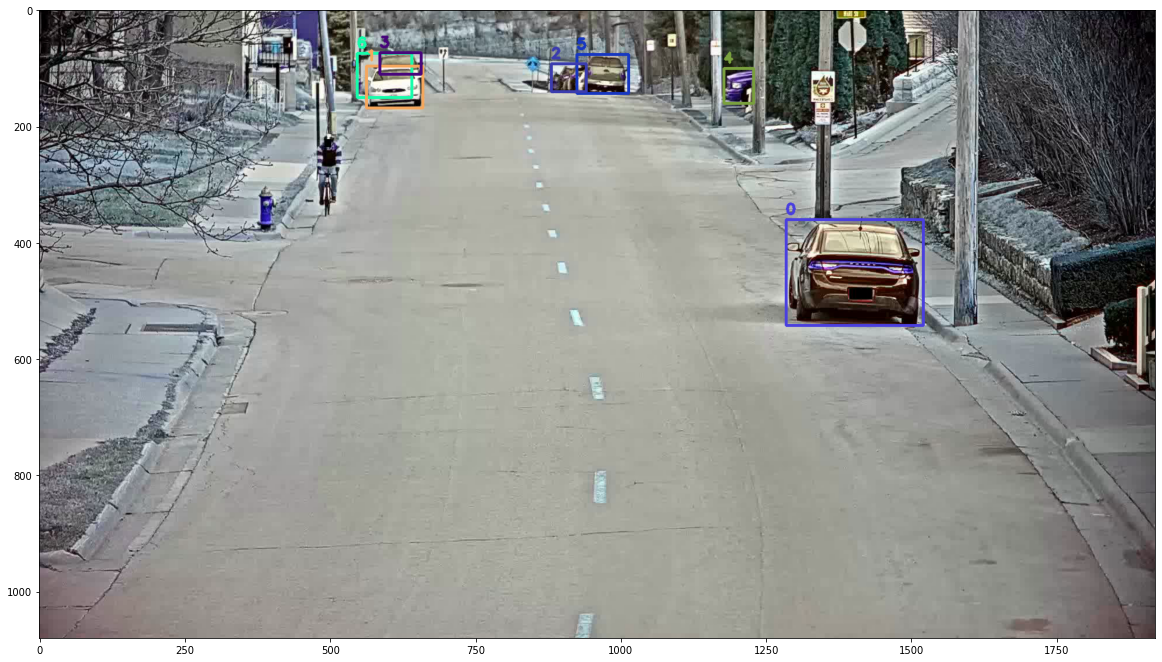

In [324]:
plt.figure(figsize=(20, 12))
plt.imshow(image)